In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load the data
file_path = '/content/yahoo_data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')  # Ensure data is sorted by date
df.set_index('Date', inplace=True)

In [ ]:
# Select relevant features (e.g., Close prices for simplicity)
data = df[['Close*']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
# Prepare data for time-series (sliding window)
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data_scaled, time_steps)

In [ ]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# Model definition
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2223 - val_loss: 0.0019
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 9.4821e-04
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0635e-04 - val_loss: 9.9087e-04
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8634e-04 - val_loss: 8.5236e-04
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7258e-04 - val_loss: 8.9142e-04
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5388e-04 - val_loss: 8.9943e-04
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4243e-04 - val_loss: 9.0335e-04
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4537e-04 - val_loss: 8.3581e-04
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6748e-04 - val_loss: 8.3046e-04
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6849e-04 - val_loss: 8.2223e-04
Epoch

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Mean Squared Error: 0.0007198294070762068


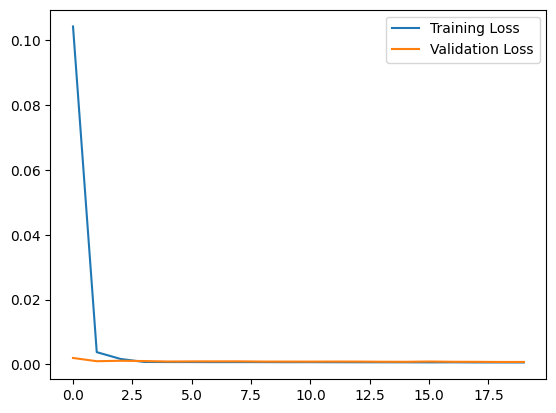

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

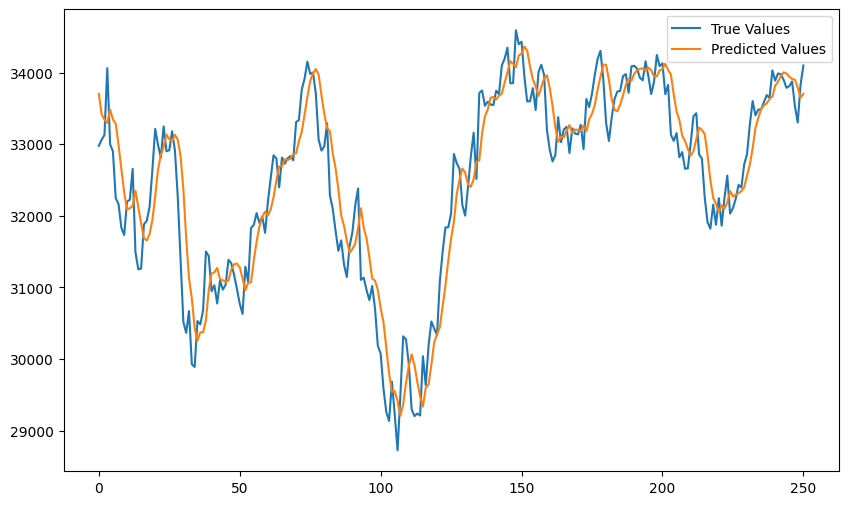

In [ ]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test), label='True Values')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted Values')
plt.legend()
plt.show()
